In [1]:
!pip install streamlit 
!pip install plotly
!pip install streamlit-keplergl

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

In [2]:
df = pd.read_csv('nyc_bikes_dist.csv', index_col = 0)

C:\Users\mojos\AppData\Local\Temp\ipykernel_7828\3433673912.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nyc_bikes_dist.csv', index_col = 0)


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_time             object
date                   object
avgTemp               float64
bike_rides_daily        int64
trip_time             float64
trip_dist_km          float64
_merge                 object
value                   int64
dtype: object

In [4]:
df = df.drop(columns=['_merge'])

In [5]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [6]:
# Create the season column

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']
    ]

In [7]:
df.shape

(30689921, 22)

In [8]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', 'bike_rides_daily',
       'trip_time', 'trip_dist_km', 'value', 'month', 'season'],
      dtype='object')

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,start_time,date,avgTemp,bike_rides_daily,trip_time,trip_dist_km,value,month,season
0,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.741740,-73.994156,...,member,2022-01-01 05:11:08,2022-01-01,11.6,20895,4.0,0.783088,1,1,winter
1,91C955306D2CF8A6,electric_bike,2022-01-01 20:54:00,2022-01-01 21:06:39,Bedford Ave & Nassau Ave,5550.05,Sharon St & Olive St,5323.05,40.723117,-73.952123,...,member,2022-01-01 20:54:00,2022-01-01,11.6,20895,13.0,1.434057,1,1,winter
2,B379B77AEB677F2A,electric_bike,2022-01-01 15:48:06,2022-01-01 16:44:21,Central Park W & W 91 St,7453.01,5 Ave & E 87 St,7323.09,40.788665,-73.966801,...,casual,2022-01-01 15:48:06,2022-01-01,11.6,20895,56.0,0.915302,1,1,winter
3,1F1368CC1EEDA296,electric_bike,2022-01-01 02:32:52,2022-01-01 02:44:51,West End Ave & W 78 St,7340.07,W 44 St & 11 Ave,6756.05,40.783786,-73.981687,...,casual,2022-01-01 02:32:52,2022-01-01,11.6,20895,12.0,2.741188,1,1,winter
4,9FE4ABC81014D80D,electric_bike,2022-01-01 17:43:17,2022-01-01 17:52:31,Lawrence St & Willoughby St,4596.09,Carroll St & 6 Ave,4019.06,40.692362,-73.986317,...,member,2022-01-01 17:43:17,2022-01-01,11.6,20895,9.0,2.128204,1,1,winter


In [10]:
## Groupby

df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

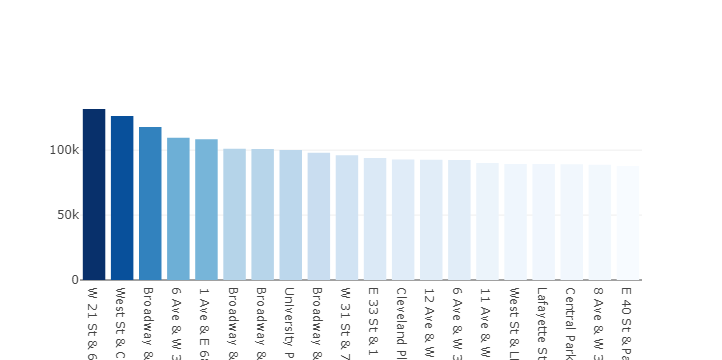

In [12]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

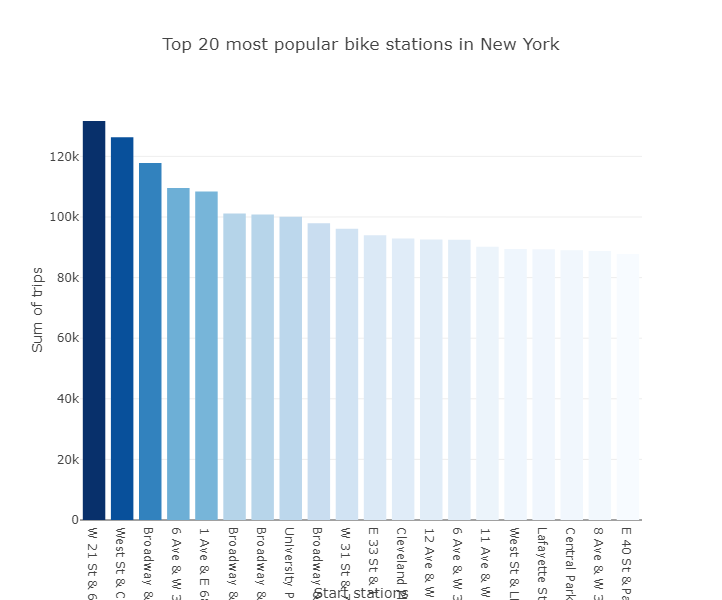

In [24]:
## Bar chart

fig.update_layout(
    title = 'Top 20 most popular bike stations in New York',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600
)

In [14]:
import gc # this is a garbage collector
gc.collect()

207

In [15]:
# Save the top 20 stations as a csv file 

top20.to_csv('top20.csv')

In [16]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', 'bike_rides_daily',
       'trip_time', 'trip_dist_km', 'value', 'month', 'season'],
      dtype='object')

In [17]:
columns_to_select = ['start_station_name', 'end_station_name', 'date', 'avgTemp', 'value',
       'bike_rides_daily', 'season']

df_1 = df[columns_to_select]

In [18]:
df_1.columns

Index(['start_station_name', 'end_station_name', 'date', 'avgTemp', 'value',
       'bike_rides_daily', 'season'],
      dtype='object')

In [25]:
df_1.shape

(30689921, 7)

In [26]:
np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.95

In [27]:
small = df_1[~red]

In [28]:
small.shape

(1533137, 7)

In [29]:
small.to_csv('reduced_data_to_plot_7.csv',index = False)

In [23]:
df_1.to_csv('reduced_data_to_plot.csv')